<a href="https://colab.research.google.com/github/Akashphadatare/Vashisht-hackathon-template/blob/main/CSP_OFFICIAL_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data
data = pd.read_csv('suryapet_paddy_fields1.csv')
# Preprocess the data
data['Weather'] = data['Weather'].astype('category')
data['Soil'] = data['Soil'].astype('category')
data['Rainfall'] = data['Rainfall'].astype('float')
data['Temperature'] = data['Temperature'].astype('float')
data['Farmer_name'] = data['Farmer_name'].astype('category')
data['Crop_yield'] = data['Crop_yield'].astype('float')
data.head()

,Crop_Name,Weather,Soil,Rainfall,Temperature,Crop_yield,Farmer_name
0,paddy,Hot,Sandy,0.0,1.0,0.1,1
1,paddy,Hot,Sandy,0.0,0.0,0.5,2
2,paddy,Hot,Sandy,1.0,1.0,1.0,3
3,paddy,Hot,Sandy,1.0,0.0,0.0,4
4,paddy,Hot,Sandy,0.0,1.0,0.8,5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.tail()

,Crop_Name,Weather,Soil,Rainfall,Temperature,Crop_yield,Farmer_name
39,paddy,Mild,Clayey,1.0,0.0,0.8,40
40,paddy,Cold,Sandy,0.0,1.0,0.6,41
41,paddy,Cold,Sandy,0.0,0.0,0.2,42
42,paddy,Cold,Sandy,1.0,1.0,0.4,43
43,paddy,Cold,Sandy,1.0,0.0,0.9,44


In [ ]:
data.isnull().sum()

Crop_Name      0
Weather        0
Soil           0
Rainfall       0
Temperature    0
Crop_yield     0
Farmer_name    0
dtype: int64

In [ ]:
data.shape

(44, 7)

In [ ]:
data.size

308

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Crop_Name    44 non-null     object  
 1   Weather      44 non-null     category
 2   Soil         44 non-null     category
 3   Rainfall     44 non-null     float64 
 4   Temperature  44 non-null     float64 
 5   Crop_yield   44 non-null     float64 
 6   Farmer_name  44 non-null     category
dtypes: category(3), float64(3), object(1)
memory usage: 3.3+ KB


In [ ]:
data.isna().sum()

Crop_Name      0
Weather        0
Soil           0
Rainfall       0
Temperature    0
Crop_yield     0
Farmer_name    0
dtype: int64

In [ ]:
data.columns

Index(['Crop_Name', 'Weather', 'Soil', 'Rainfall', 'Temperature', 'Crop_yield',
       'Farmer_name'],
      dtype='object')

In [ ]:
data.describe()

,Rainfall,Temperature,Crop_yield
count,44.000000,44.000000,44.000000
mean,0.500000,0.500000,0.568182
std,0.505781,0.505781,0.350264
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.275000
50%,0.500000,0.500000,0.600000
75%,1.000000,1.000000,0.900000
max,1.000000,1.000000,1.000000


In [ ]:
data["Farmer_name"].unique()

[1, 2, 3, 4, 5, ..., 40, 41, 42, 43, 44]
Length: 44
Categories (44, int64): [1, 2, 3, 4, ..., 41, 42, 43, 44]

In [ ]:
#as there are no null values in the data set lets visualize the data


# VISUALIZE THE DATA IN THE DATASET

# In[14]:


print(data.corr())


# In[15]:


import plotly.express as px
#let us visualize this in the heat map
plt.figure(figsize=(20,20))
px.imshow(data.corr(),text_auto=True)


                 Rainfall   Temperature  Crop_yield
Rainfall     1.000000e+00  4.541821e-17    0.341308
Temperature  4.541821e-17  1.000000e+00    0.393817
Crop_yield   3.413085e-01  3.938175e-01    1.000000


<Figure size 2000x2000 with 0 Axes>

In [ ]:
px.histogram(data,x="Farmer_name",text_auto=True,pattern_shape="Farmer_name",pattern_shape_sequence=['', '/', '\\', 'x', '-', '|', '+', '.'])


In [ ]:
#now describing the farmers in the data set
farmer_names=data["Farmer_name"].unique()
for i in farmer_names:
    data=data[data["Farmer_name"]==i]
    print(data.describe())
    print(i)


       Rainfall  Temperature  Crop_yield
count       1.0          1.0         1.0
mean        0.0          1.0         0.1
std         NaN          NaN         NaN
min         0.0          1.0         0.1
25%         0.0          1.0         0.1
50%         0.0          1.0         0.1
75%         0.0          1.0         0.1
max         0.0          1.0         0.1
1
       Rainfall  Temperature  Crop_yield
count       0.0          0.0         0.0
mean        NaN          NaN         NaN
std         NaN          NaN         NaN
min         NaN          NaN         NaN
25%         NaN          NaN         NaN
50%         NaN          NaN         NaN
75%         NaN          NaN         NaN
max         NaN          NaN         NaN
2
       Rainfall  Temperature  Crop_yield
count       0.0          0.0         0.0
mean        NaN          NaN         NaN
std         NaN          NaN         NaN
min         NaN          NaN         NaN
25%         NaN          NaN         NaN
50%         

In [ ]:
data = pd.read_csv('suryapet_paddy_fields3.csv')
# Preprocess the data
data['Weather'] = data['Weather'].astype('float')
data['Soil'] = data['Soil'].astype('float')
data['Rainfall'] = data['Rainfall'].astype('float')
data['Temperature'] = data['Temperature'].astype('float')
data['Farmer_name'] = data['Farmer_name'].astype('float')
data['Crop_yield'] = data['Crop_yield'].astype('float')

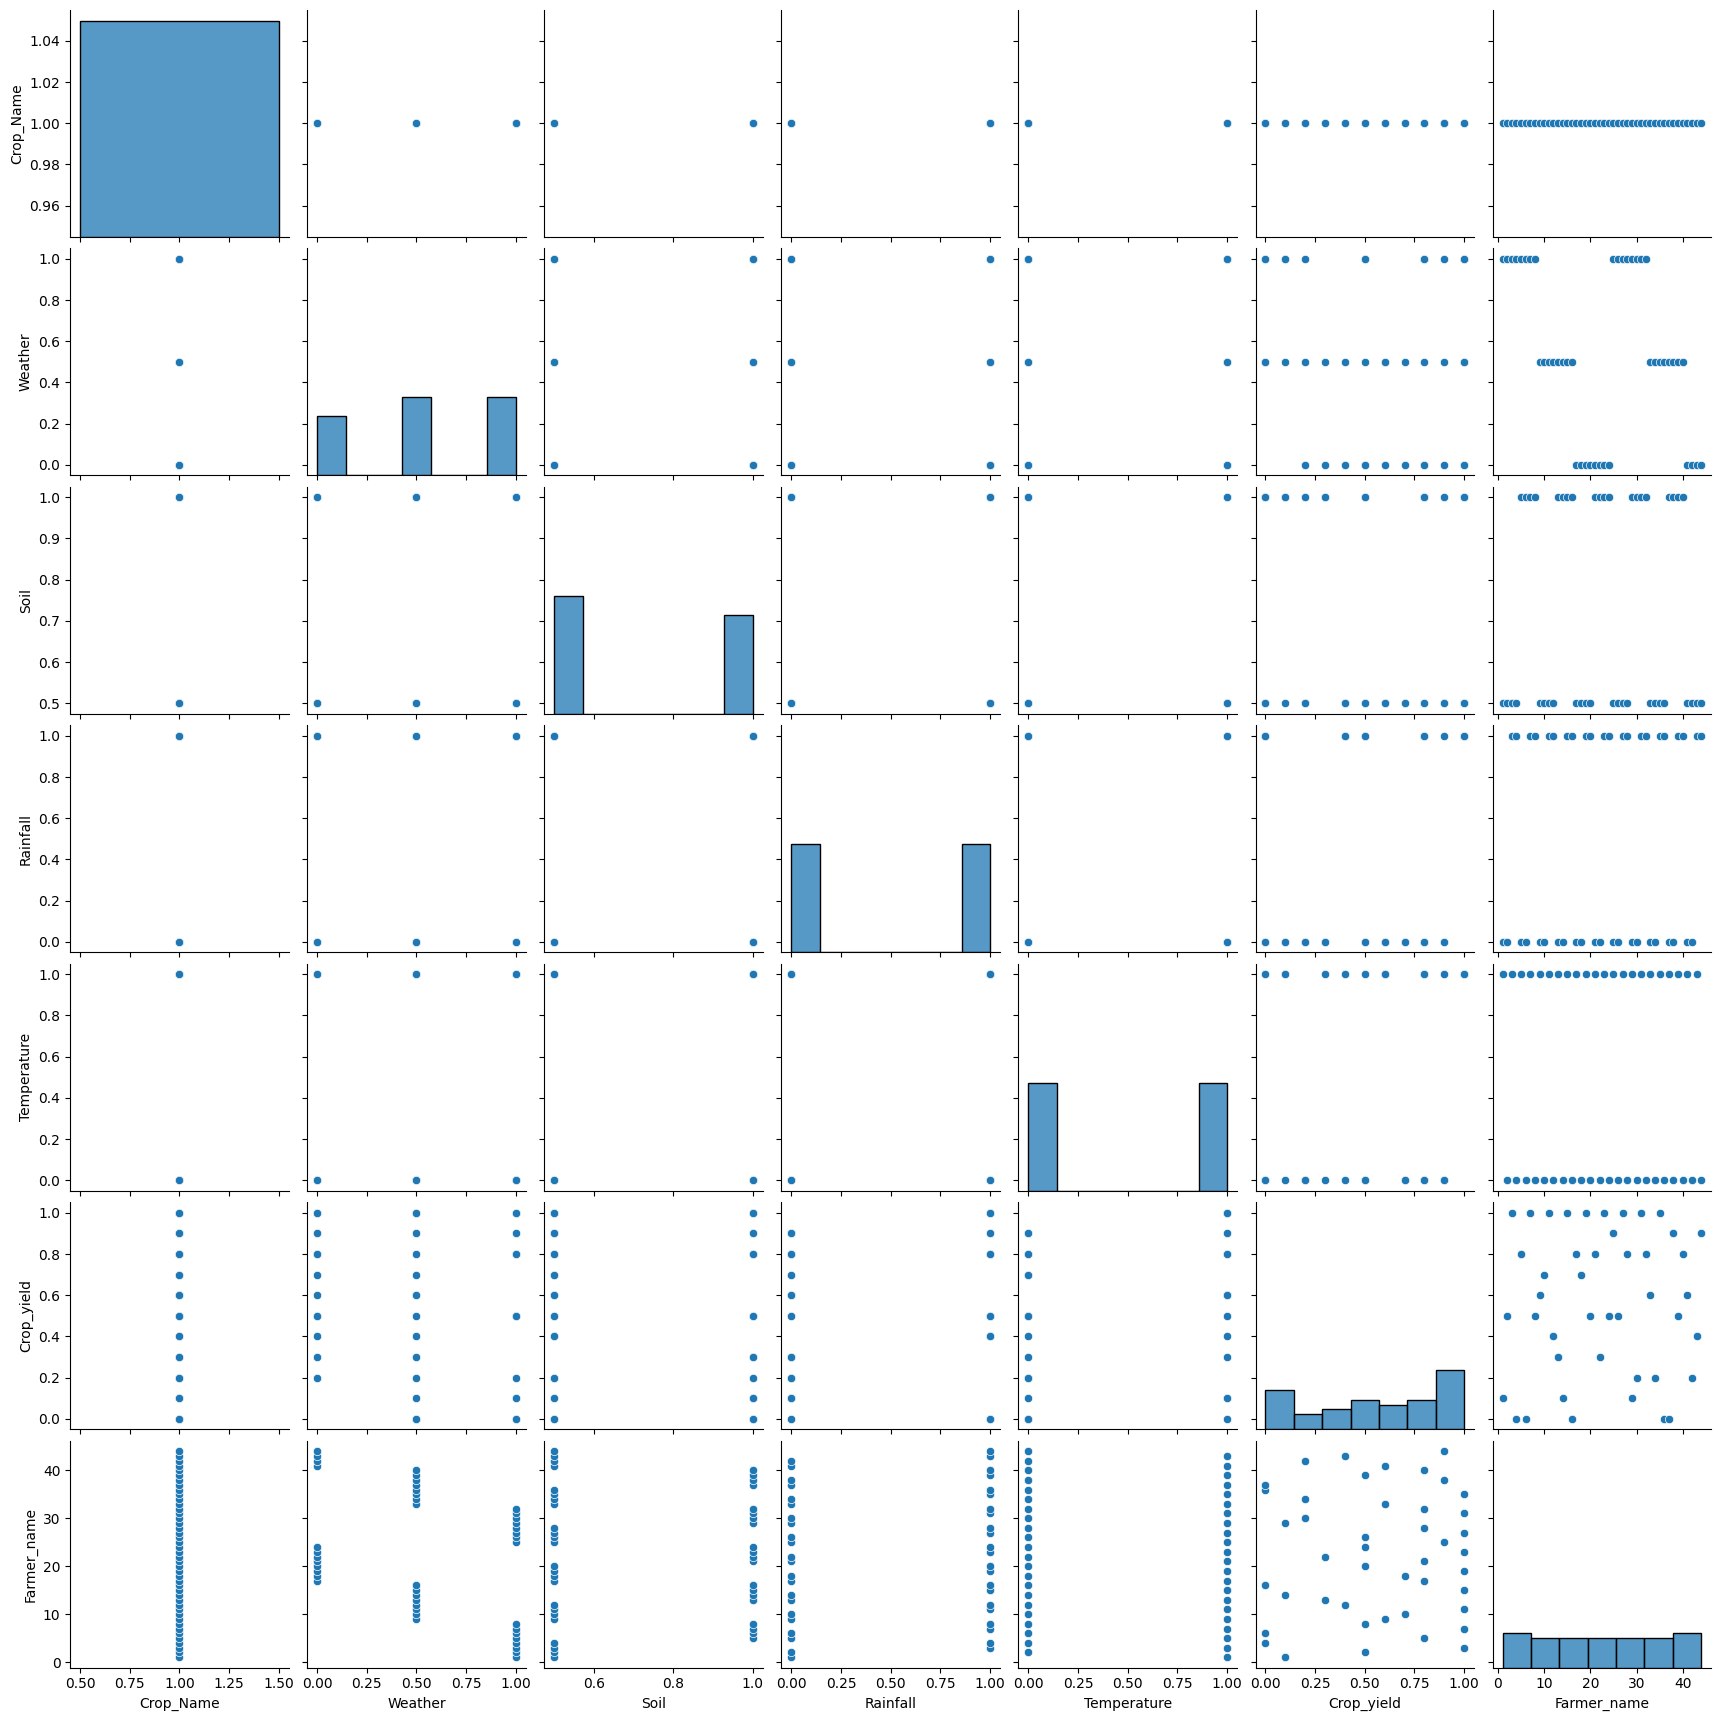

In [ ]:
sns.pairplot(data)

<Axes: xlabel='Rainfall', ylabel='Density'>

<Figure size 3000x3000 with 0 Axes>

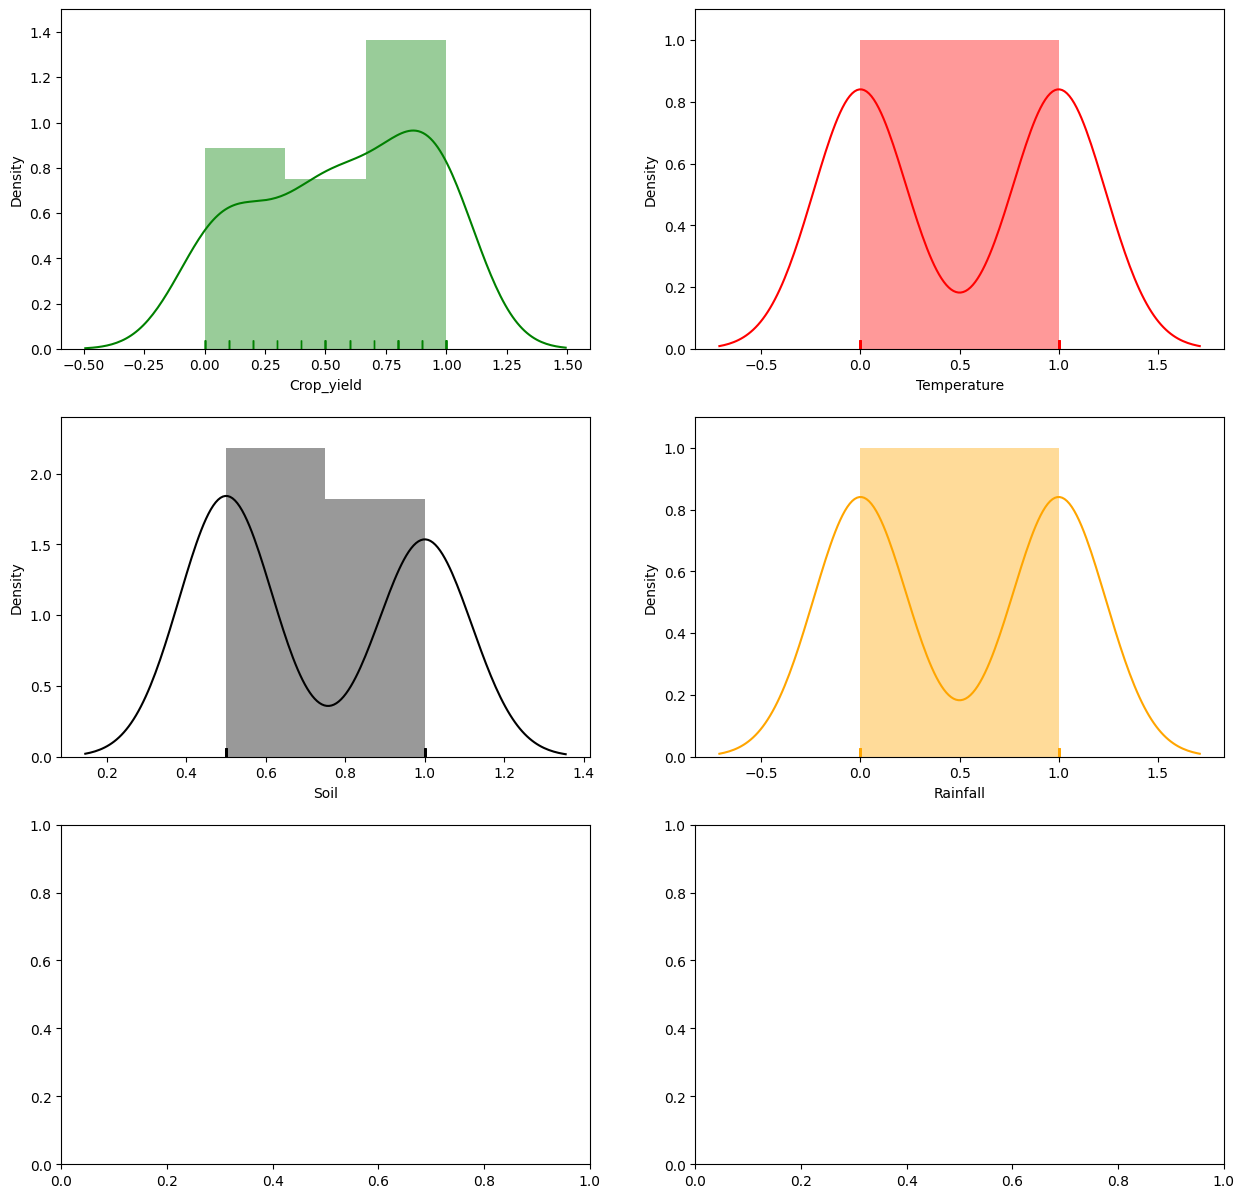

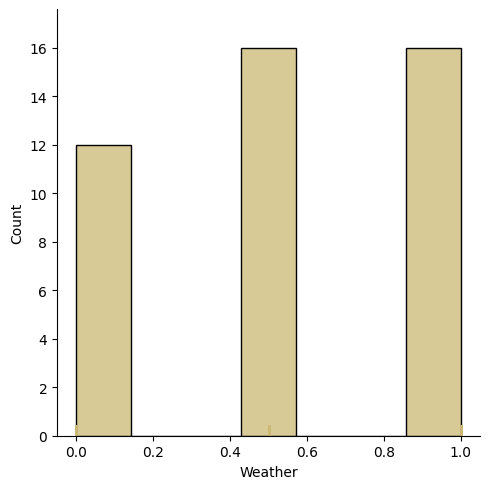

In [ ]:
sns.set_color_codes()
plt.figure(figsize=(30,30))
fig,axs=plt.subplots(3,2,figsize=(15,15))
sns.distplot(data["Crop_yield"],color="green",rug=True,ax=axs[0,0])
sns.displot(data["Weather"],color="y",rug=True,ax=axs[1,0])
sns.distplot(data["Temperature"],color="red",rug=True,ax=axs[0,1])
sns.distplot(data["Soil"],color="black",rug=True,ax=axs[1,0])
sns.distplot(data["Rainfall"],color="orange",rug=True,ax=axs[1,1])

In [ ]:
# Split the data into training and testing sets
X_train ,X_test, y_train, y_test = train_test_split(data.drop('Farmer_name', axis=1), data['Farmer_name'], test_size=0.5,random_state=40)

In [ ]:
X_train

,Crop_Name,Weather,Soil,Rainfall,Temperature,Crop_yield
25,1,1.0,0.5,0.0,0.0,0.5
14,1,0.5,1.0,1.0,1.0,1.0
15,1,0.5,1.0,1.0,0.0,0.0
20,1,0.0,1.0,0.0,1.0,0.8
8,1,0.5,0.5,0.0,1.0,0.6
35,1,0.5,0.5,1.0,0.0,0.0
21,1,0.0,1.0,0.0,0.0,0.3
17,1,0.0,0.5,0.0,0.0,0.7
0,1,1.0,0.5,0.0,1.0,0.1
9,1,0.5,0.5,0.0,0.0,0.7


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 6)
(22, 6)
(22,)
(22,)


In [ ]:
#assume(paddy = 1,hot = 0,mild=0.5,cold = 1,clayey = 1,sandy = 0.5)

In [ ]:
# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)
print(X_test)
print(y_pred)


    Crop_Name  Weather  Soil  Rainfall  Temperature  Crop_yield
24          1      1.0   0.5       0.0          1.0         0.9
28          1      1.0   1.0       0.0          1.0         0.1
30          1      1.0   1.0       1.0          1.0         1.0
39          1      0.5   1.0       1.0          0.0         0.8
4           1      1.0   1.0       0.0          1.0         0.8
43          1      0.0   0.5       1.0          0.0         0.9
38          1      0.5   1.0       1.0          1.0         0.5
16          1      0.0   0.5       0.0          1.0         0.8
11          1      0.5   0.5       1.0          0.0         0.4
32          1      0.5   0.5       0.0          1.0         0.6
29          1      1.0   1.0       0.0          0.0         0.2
18          1      0.0   0.5       1.0          1.0         1.0
22          1      0.0   1.0       1.0          1.0         1.0
23          1      0.0   1.0       1.0          0.0         0.5
2           1      1.0   0.5       1.0  

R2: -2.0616290610732486
MSE: 478.0
RMSE: 21.863211109075447
MAE: 18.818181818181817
EVS: 0.03463243565142571


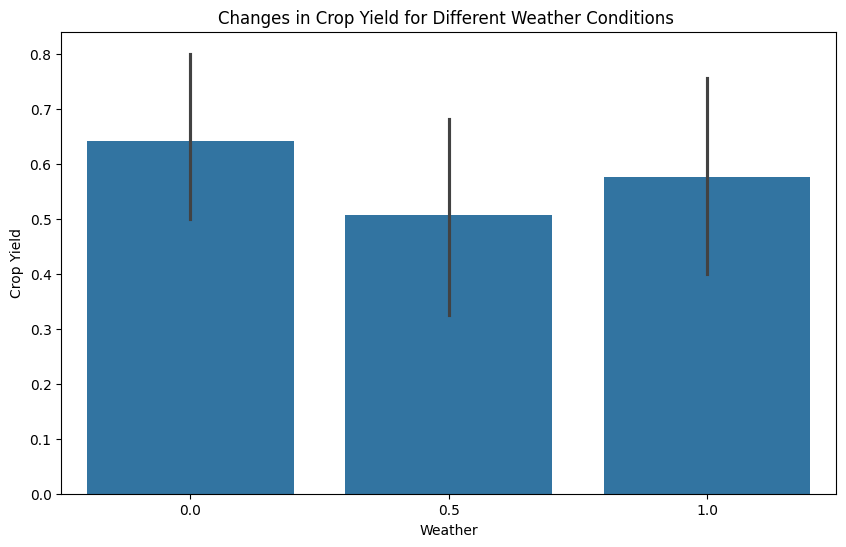

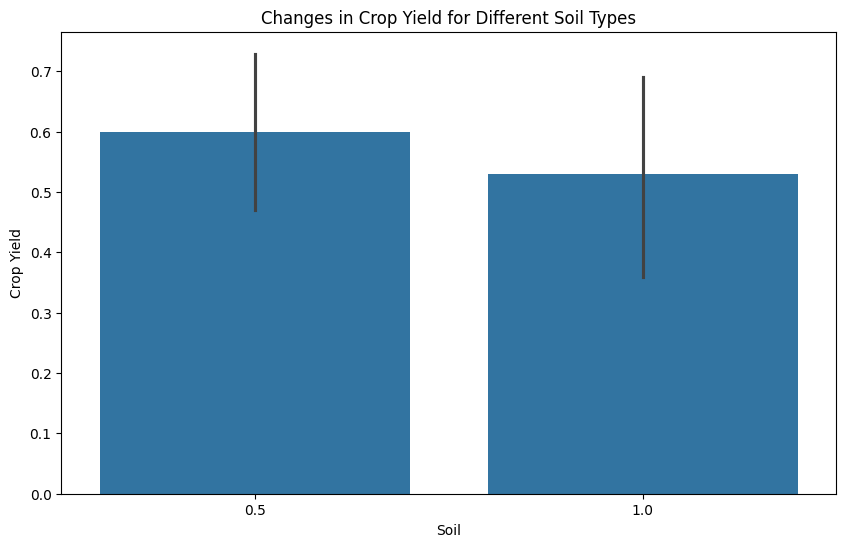

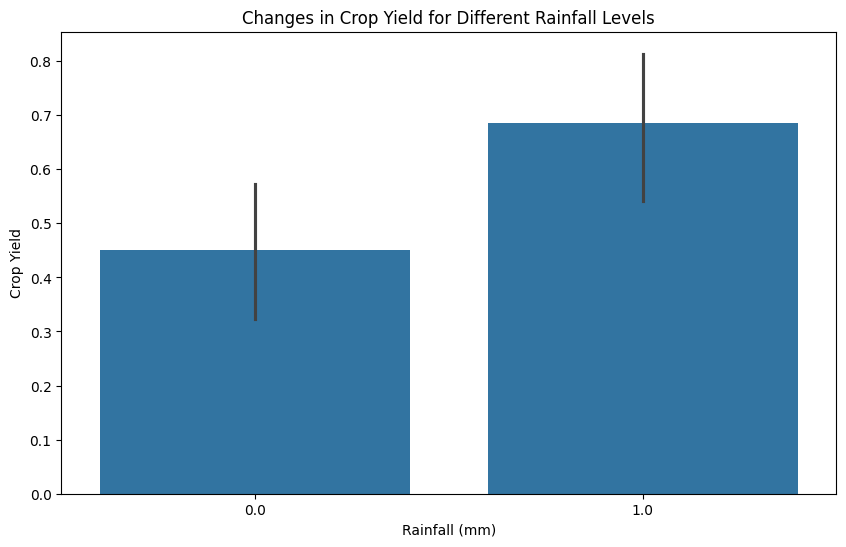

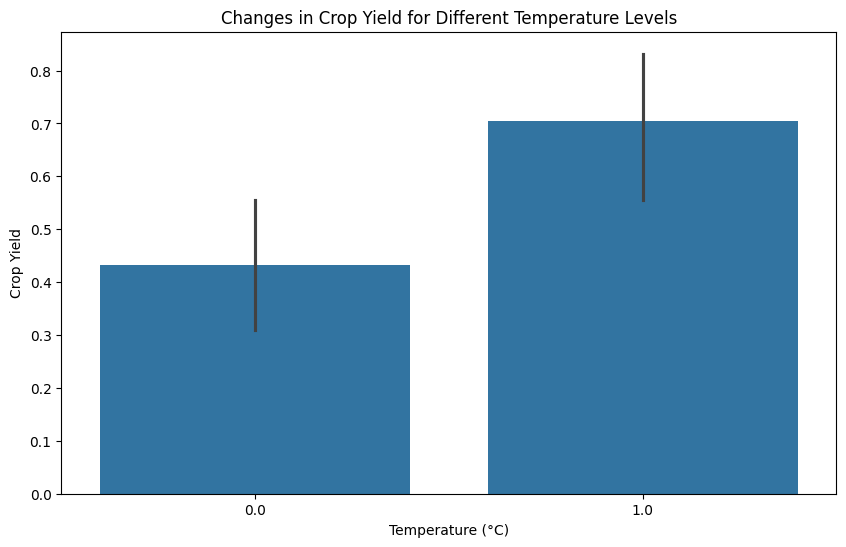

In [ ]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print('R2:', r2)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('EVS:', evs)
# Visualize the changes in crop yield for different weather conditions
plt.figure(figsize=(10,6))
sns.barplot(x='Weather', y='Crop_yield', data=data)
plt.title('Changes in Crop Yield for Different Weather Conditions ')
plt.xlabel('Weather')
plt.ylabel('Crop Yield')
plt.show()
# Visualize the changes in crop yield for different soil types
plt.figure(figsize=(10,6))
sns.barplot(x='Soil', y='Crop_yield', data=data)
plt.title('Changes in Crop Yield for Different Soil Types')
plt.xlabel('Soil')
plt.ylabel('Crop Yield')
plt.show()
# Visualize the changes in crop yield for different rainfall levels
plt.figure(figsize=(10,6))
sns.barplot(x='Rainfall', y='Crop_yield', data=data)
plt.title('Changes in Crop Yield for Different Rainfall Levels')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Crop Yield')
plt.show()
# Visualize the changes in crop yield for different temperature levels
plt.figure(figsize=(10,6))
sns.barplot(x='Temperature', y='Crop_yield', data=data)
plt.title('Changes in Crop Yield for Different Temperature Levels')
plt.xlabel('Temperature (°C)')
plt.ylabel('Crop Yield')
plt.show()